# HW3 Assignment I Notebook
### This notebook contains the first deliverable for HW3
This deliverable provides a view of the central limit theorem by generating different types of random sized distirbutions and ploting the means against their size.

The general flow of the notebook follows:

1) GENERATE 100 samples of different sizes N (N>10 & N<2000) from each of 5 different distributions (500 samples in total), ## all with the same population mean. Include a Normal, a Poisson, a Binomial, a Chi-Squared distribution, and 1 more of your choice.

2) For each sample plot the sample mean (dependent var.) against the sample size N (independent var.) (if you want you can do it with the sample standard deviation as well).

3) Describe the behavior you see in the plots in terms of the law of large numbers.

4) PLOT the distributions of all sample means (together for all distributions). Mandatory: as a histogram. Optional: in any other way you think is convincing ## Extra Credit: FIT a gaussian to the distribution of means

In [88]:
#Import modules, initialize the random generator
from __future__ import print_function
import pandas as pd
import numpy as np
import pylab as pl
import matplotlib.mlab as mlab

%pylab inline

#establish the seed
np.random.seed(212)

Populating the interactive namespace from numpy and matplotlib


In [135]:
# Create a nested dictionary to store all the samples, sample means and sizes for each of the types of distributions
sampleDic={'Normal':{}, 'Poisson':{},'Binomial':{},'Chi-Squared':{}}

#Generate the array with 100 different sizes (from Class Sample Notebook)
mySize = (2000 / (np.array(range(1, 101)))).astype(int)

#Generate the samples for each of the distribution types with mean = 100
myMean = 100

#We will use the np.random function, each of the distributions will have different parameters
#http://docs.scipy.org/doc/numpy/reference/routines.random.html
    

df= myMean

#Create five lists to store each of the distributions sample means
chisqMeans = []
poissonMeans = []
normalMeans = []
binomialMeans = []
laplaceMeans = []

#Create the 100 samples for each of the distribution
for i in range (100):
    sample = np.random.chisquare(df,size=mySize[i])
    chisqMeans.append(sample.mean())
    sample = np.random.poisson(df,size=mySize[i])
    poissonMeans.append(sample.mean())
    sample = np.random.normal(df,scale=3,size=mySize[i])
    normalMeans.append(sample.mean())
    sample = np.random.binomial(200,.5,size=mySize[i])
    binomialMeans.append(sample.mean())
    sample = np.random.laplace(myMean,1,size=mySize[i])
    laplaceMeans.append(sample.mean())


In [209]:
#Plot the means and size and the frequency and means
#Sample from http://matplotlib.org/users/pyplot_tutorial.html

def plotDistribution(size, means, figureText):
    #Subplot I: Mean value by sample size
    pl.figure(figsize=(10, 4))
    pl.subplot(121)
    pl.title('Mean value by sample size')
    pl.scatter(size, means)
    pl.ylabel('sample mean', fontsize = 10)
    pl.xlabel('N', fontsize = 10)
    #Subplot II historgram for the collection of sample means
    pl.subplot(122)
    pl.title('Sample Mean Frequency')
    pl.hist(means,bins=30)
    pl.xlabel('sample mean', fontsize = 10)
    pl.ylabel('N', fontsize = 10)
    figtext(0.1,0,figureText)
    pl.tight_layout(pad=3.5)
    pl.show()
  

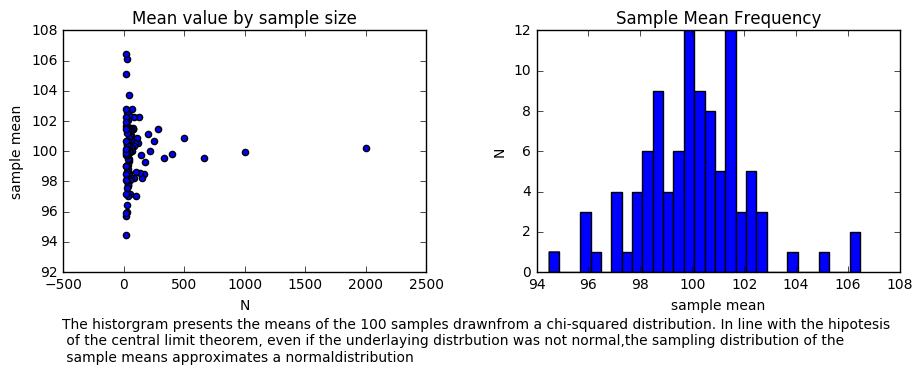

Figure 1: Chi-Squared distribution Plots


In [210]:
plotDistribution (mySize,chisqMeans,'The historgram presents the means of the 100 samples drawn' 
                  'from a chi-squared distribution. In line with the hipotesis \n of the central '
                  'limit theorem, even if the underlaying distrbution was not normal,'
                  'the sampling distribution of the \n sample means approximates a normal'
                  'distribution')
print ('Figure 1: Chi-Squared distribution Plots')

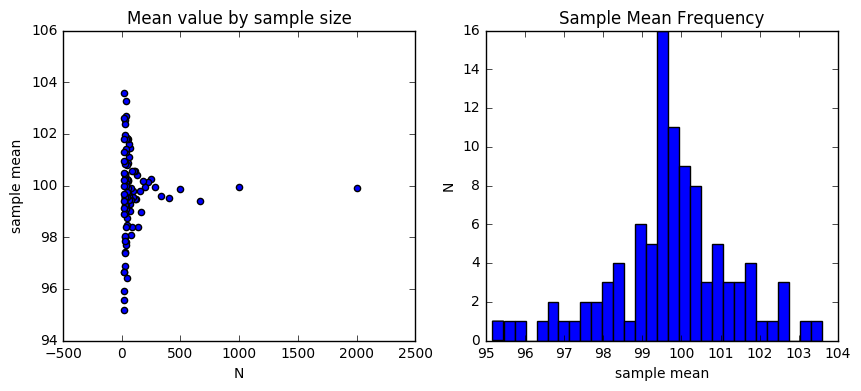

Figure 2: Poisson Distribution Plots


In [150]:
plotDistribution (mySize,poissonMeans,'')
print ('Figure 2: Poisson Distribution Plots')

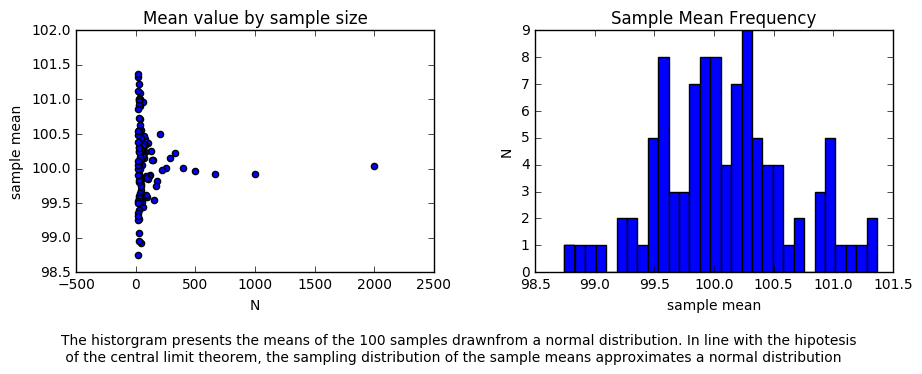

Figure 3: Normal Distribution Plots


In [214]:
plotDistribution (mySize,normalMeans,'The historgram presents the means of the 100 samples drawn' 
                  'from a normal distribution. In line with the hipotesis \n of the central '
                  'limit theorem, the sampling distribution of the sample means '
                  'approximates a normal distribution')
print ('Figure 3: Normal Distribution Plots')

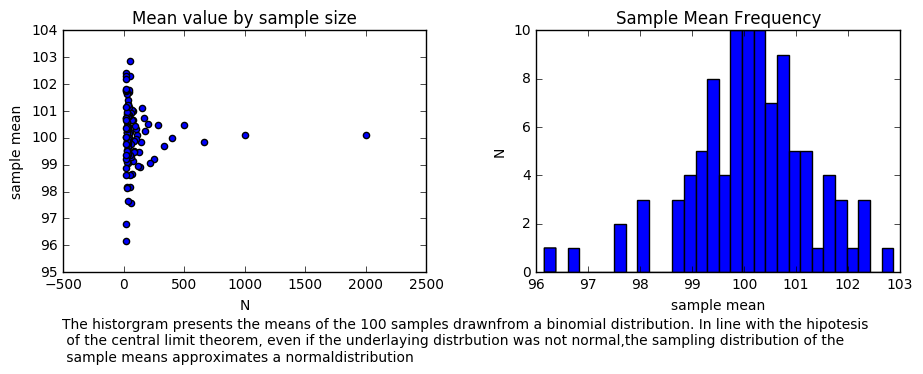

Figure 4: Binomial Distribution Plots


In [215]:
plotDistribution (mySize, binomialMeans,'The historgram presents the means of the 100 samples drawn' 
                  'from a binomial distribution. In line with the hipotesis \n of the central '
                  'limit theorem, even if the underlaying distrbution was not normal,'
                  'the sampling distribution of the \n sample means approximates a normal'
                  'distribution')
print ('Figure 4: Binomial Distribution Plots')

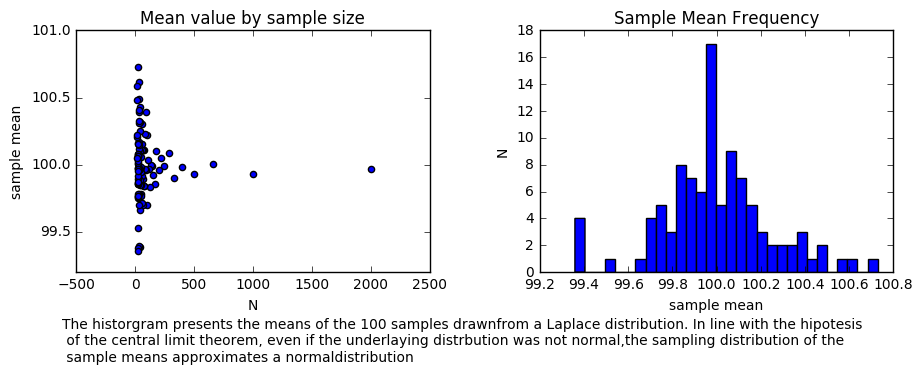

Figure 5: Laplace Distribution Plots


In [216]:
plotDistribution (mySize, laplaceMeans,'The historgram presents the means of the 100 samples drawn' 
                  'from a Laplace distribution. In line with the hipotesis \n of the central '
                  'limit theorem, even if the underlaying distrbution was not normal,'
                  'the sampling distribution of the \n sample means approximates a normal'
                  'distribution')
print ('Figure 5: Laplace Distribution Plots')

### Describing what we observe in relation to the law of large numbers:

Reference: https://ocw.mit.edu/courses/mathematics/18-05-introduction-to-probability-and-statistics-spring-2014/readings/MIT18_05S14_Reading6b.pdf

The law of large numbers establishes that the average of many independent samples is (with high probability) close to the mean of the underlying distribution. Concretely, as n grows, the probability that the mean of that sample of size n is close to μ goes to 1.

This is consistent with what we observe on the scatter plots of mean value by sample size across all distributions, where as the N increases, the sample mean for that sample gets closer to the mean that was used on the underlaying random distribution (100)

Figure 6: Distribution of all sample means for all five distribution types


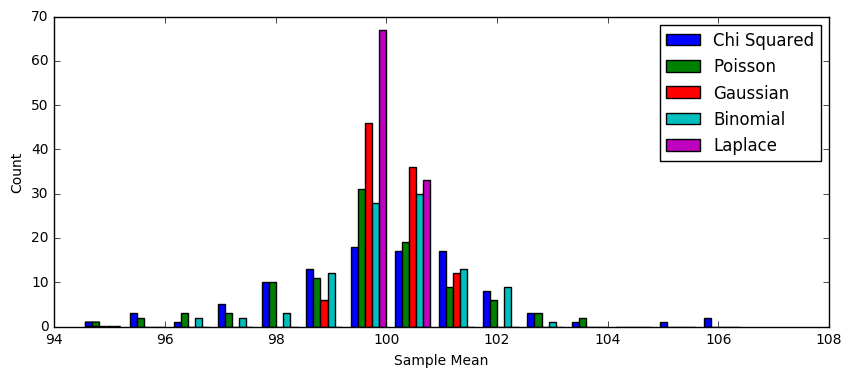

In [217]:
dists = ['Chi Squared','Poisson','Gaussian','Binomial', 'Laplace']

pl.figure(figsize=(10, 4))
pl.hist((chisqMeans,poissonMeans,normalMeans,binomialMeans,laplaceMeans), bins = 15, label = dists)
pl.xlabel('Sample Mean')
pl.ylabel('Count')
pl.legend(dists)

print('Figure 6: Distribution of all sample means for all five distribution types')